In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data = pd.read_csv("customer_segmentation.csv")
data.head()


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [7]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [9]:
data.isna().sum().sum()

np.int64(24)

In [11]:
data = data.dropna()

In [12]:
 data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,...,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,3.0,11.0,0.150271
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,...,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.0,0.0,0.357417
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [15]:
data["Education"].value_counts()

Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64

In [16]:
data["Marital_Status"].value_counts()

Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [19]:
data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"],dayfirst = True)

In [20]:
data.info

<bound method DataFrame.info of          ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
0            0  2012-09-04    

In [22]:
data["Age"] = 2025 - data["Year_Birth"]

In [24]:
data["Age"]

0       68
1       71
2       60
3       41
4       44
        ..
2235    58
2236    79
2237    44
2238    69
2239    71
Name: Age, Length: 2216, dtype: int64

In [26]:
data["Total_Children"] = data["Kidhome"] + data["Teenhome"]

In [27]:
data["Total_Children"]

0       0
1       2
2       0
3       1
4       1
       ..
2235    1
2236    3
2237    0
2238    1
2239    2
Name: Total_Children, Length: 2216, dtype: int64

In [28]:
spend_cols = ["MntWines","MntFruits","MntMeatProducts","MntFishProducts","MntSweetProducts","MntGoldProds"]

In [30]:
data["Total_Spending"] = data[spend_cols].sum(axis = 1)

In [31]:
data[["Total_Spending"]]

,Total_Spending
0,1617
1,27
2,776
3,53
4,422
...,...
2235,1341
2236,444
2237,1241
2238,843


In [32]:
  data["Customer_Since"] = (pd.Timestamp("today") - data["Dt_Customer"]).dt.days

In [33]:
data["Customer_Since"]

0       4881
1       4331
2       4530
3       4357
4       4379
        ... 
2235    4599
2236    4237
2237    4373
2238    4374
2239    4840
Name: Customer_Since, Length: 2216, dtype: int64

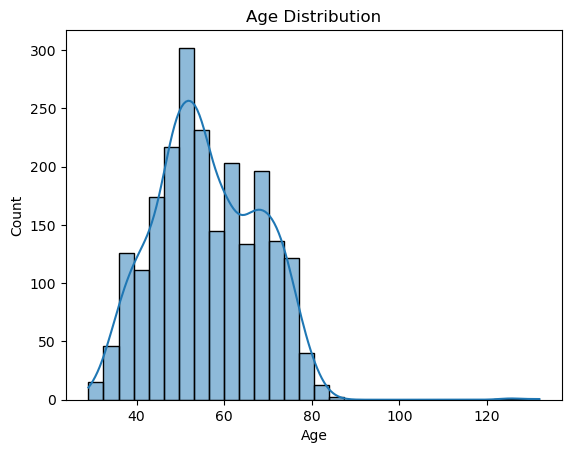

In [34]:
#Exploritory data analysis
sns.histplot(data["Age"],bins = 30,kde = True)
plt.title("Age Distribution")
plt.show()

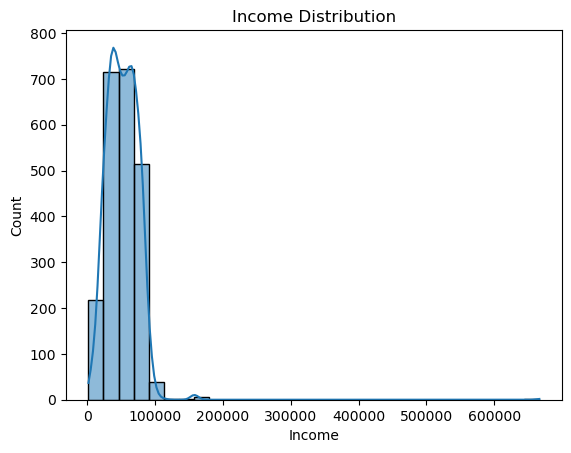

In [35]:
sns.histplot(data["Income"],bins = 30,kde = True)
plt.title("Income Distribution")
plt.show()

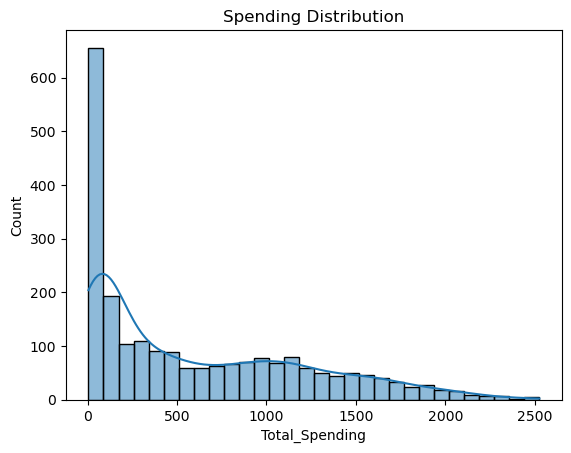

In [36]:
sns.histplot(data["Total_Spending"],bins = 30,kde = True)
plt.title("Spending Distribution")
plt.show()

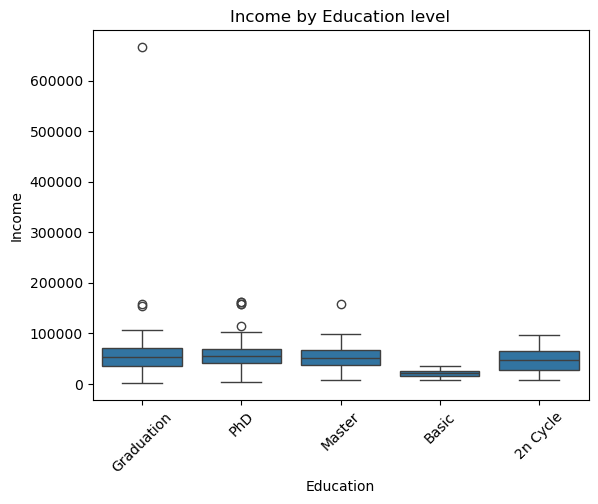

In [37]:
#CAtegorical Analysis
sns.boxplot(x = "Education", y = "Income", data = data)
plt.xticks(rotation = 45)
plt.title("Income by Education level")
plt.show()

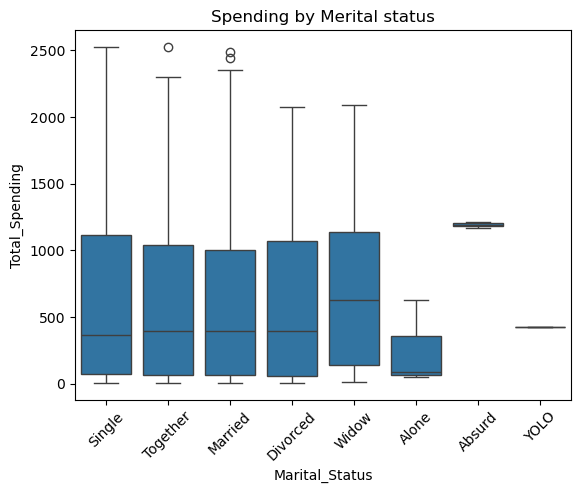

In [38]:
sns.boxplot(x = "Marital_Status", y = "Total_Spending", data = data)
plt.xticks(rotation = 45)
plt.title("Spending by Merital status")
plt.show()

In [42]:
#corrolation
corr = data[["Income","Age","Recency","Total_Spending","NumWebPurchases","NumStorePurchases"]].corr()

In [43]:
corr

,Income,Age,Recency,Total_Spending,NumWebPurchases,NumStorePurchases
Income,1.000000,0.161791,-0.003970,0.667576,0.387878,0.529362
Age,0.161791,1.000000,0.016295,0.113487,0.153051,0.127891
Recency,-0.003970,0.016295,1.000000,0.020066,-0.005641,-0.000434
Total_Spending,0.667576,0.113487,0.020066,1.000000,0.528973,0.675181
NumWebPurchases,0.387878,0.153051,-0.005641,0.528973,1.000000,0.516240
NumStorePurchases,0.529362,0.127891,-0.000434,0.675181,0.516240,1.000000


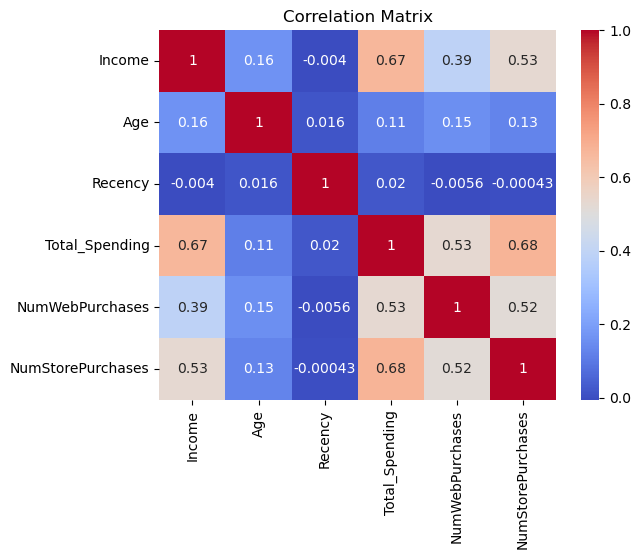

In [44]:
sns.heatmap(corr,annot = True,cmap = "coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [45]:
pivot_income = data.pivot_table(values = "Income", index = "Education", columns = "Marital_Status", aggfunc="mean")

In [46]:
pivot_income

Marital_Status,Absurd,Alone,Divorced,Married,Single,Together,Widow,YOLO
Education,,,,,,,,
2n Cycle,NaN,NaN,49395.130435,46201.100000,53673.944444,44736.410714,51392.200000,NaN
Basic,NaN,NaN,9548.000000,21960.500000,18238.666667,21240.071429,22123.000000,NaN
Graduation,79244.0,34176.0,54526.042017,50800.258741,51322.182927,55758.480702,54976.657143,NaN
Master,65487.0,61331.0,50331.945946,53286.028986,53530.560000,52109.009804,58401.545455,NaN
PhD,NaN,35860.0,53096.615385,58138.031579,53314.614583,56041.422414,60288.083333,48432.0


Text(0.5, 1.0, 'Average Income by Education and Marital Status')

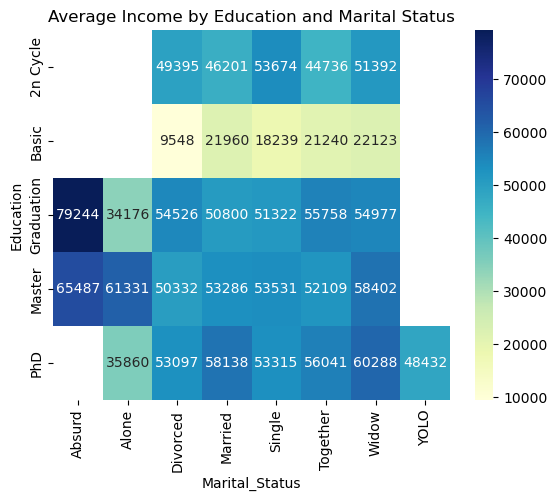

In [47]:
sns.heatmap(pivot_income, annot= True, fmt=".0f",cmap = "YlGnBu")
plt.title("Average Income by Education and Marital Status")

In [49]:
group1 = data.groupby("Education")["Total_Spending"].mean().sort_values(ascending= False)

In [50]:
group1

Education
PhD           676.733888
Graduation    621.686380
Master        609.767123
2n Cycle      494.930000
Basic          81.796296
Name: Total_Spending, dtype: float64

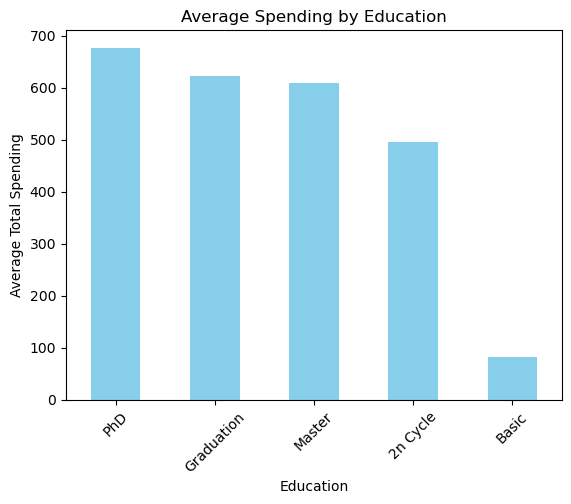

In [51]:
group1.plot(kind="bar", color = "skyblue")
plt.title("Average Spending by Education")
plt.ylabel("Average Total Spending")
plt.xticks(rotation = 45)
plt.show()

In [52]:
data["AcceptedAny"] = data[["AcceptedCmp1","AcceptedCmp2","AcceptedCmp3","AcceptedCmp4","AcceptedCmp5","Response"]].sum(axis=1)

In [54]:
data["AcceptedAny"].unique()

array([1, 0, 3, 2, 4, 5])

In [55]:
data["AcceptedAny"] = data["AcceptedAny"].apply(lambda x:1 if x > 0 else 0)

In [56]:
data["AcceptedAny"].unique()

array([1, 0])

In [58]:
group2 = data.groupby("Marital_Status")["AcceptedAny"].mean().sort_values(ascending= False)

In [59]:
group2

Marital_Status
Absurd      0.500000
YOLO        0.500000
Widow       0.342105
Alone       0.333333
Single      0.312102
Divorced    0.297414
Married     0.252042
Together    0.251309
Name: AcceptedAny, dtype: float64

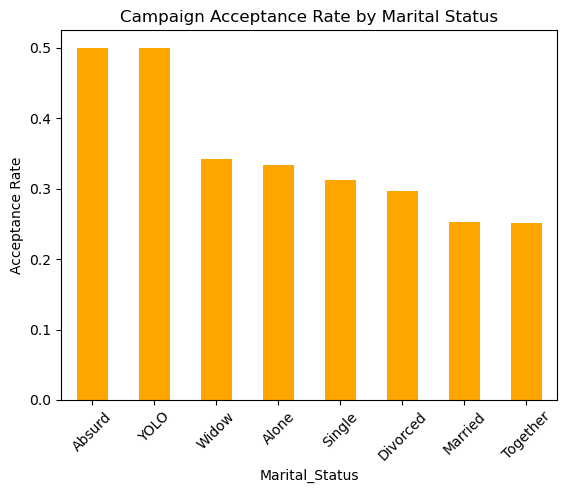

In [61]:
group2.plot(kind="bar",color= "orange")
plt.title("Campaign Acceptance Rate by Marital Status")
plt.ylabel("Acceptance Rate")
plt.xticks(rotation = 45)
plt.show()

In [62]:
#Average income by age groups
bins = [18,30,40,50,60,70,90]

In [63]:
labels = ["18-29","30-39","40-49","50-59","60-69","70+"]

In [64]:
data["AgeGroup"] = pd.cut(data["Age"],bins = bins,labels =labels )

In [67]:
data["AgeGroup"]

0       60-69
1         70+
2       50-59
3       40-49
4       40-49
        ...  
2235    50-59
2236      70+
2237    40-49
2238    60-69
2239      70+
Name: AgeGroup, Length: 2216, dtype: category
Categories (6, object): ['18-29' < '30-39' < '40-49' < '50-59' < '60-69' < '70+']

In [69]:
group3 = data.groupby("AgeGroup")["Income"].mean()

C:\Users\blekg\AppData\Local\Temp\ipykernel_20740\588528920.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group3 = data.groupby("AgeGroup")["Income"].mean()


In [71]:
group3

AgeGroup
18-29    46658.000000
30-39    46283.028302
40-49    49224.877034
50-59    50812.913303
60-69    56200.827887
70+      58944.316294
Name: Income, dtype: float64

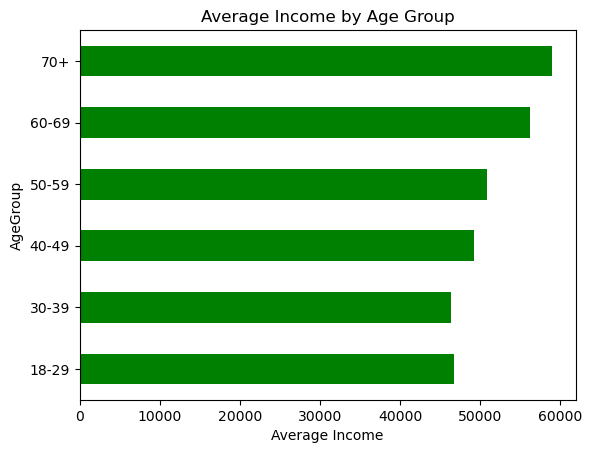

In [72]:
group3.plot(kind="barh", color= "green")
plt.title("Average Income by Age Group")
plt.xlabel("Average Income")
plt.show()

In [74]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Total_Children', 'Total_Spending', 'Customer_Since',
       'AcceptedAny', 'AgeGroup'],
      dtype='object')

In [80]:
Features = ["Age","Income","Total_Spending","NumWebPurchases","NumStorePurchases","NumWebVisitsMonth","Recency"]

In [82]:
x = data[Features].copy()

In [83]:
x

,Age,Income,Total_Spending,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth,Recency
0,68,58138.0,1617,8,4,7,58
1,71,46344.0,27,1,2,5,38
2,60,71613.0,776,8,10,4,26
3,41,26646.0,53,2,4,6,26
4,44,58293.0,422,5,6,5,94
...,...,...,...,...,...,...,...
2235,58,61223.0,1341,9,4,5,46
2236,79,64014.0,444,8,5,7,56
2237,44,56981.0,1241,2,13,6,91
2238,69,69245.0,843,6,10,3,8


In [84]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [85]:
X_scaled = scaler.fit_transform(x)

In [86]:
X_scaled

array([[ 0.98644293,  0.2340627 ,  1.67548812, ..., -0.55414289,
         0.69323197,  0.31053212],
       [ 1.23680074, -0.23455948, -0.96235832, ..., -1.16951781,
        -0.1315745 , -0.38050944],
       [ 0.31882209,  0.76947764,  0.28024985, ...,  1.29198186,
        -0.54397773, -0.79513438],
       ...,
       [-1.01641959,  0.18809052,  1.05169551, ...,  2.21504423,
         0.28082874,  1.4507507 ],
       [ 1.06989553,  0.67538765,  0.39140438, ...,  1.29198186,
        -0.95638097, -1.41707178],
       [ 1.23680074,  0.02470453, -0.7218    , ..., -0.55414289,
         0.69323197, -0.31140528]], shape=(2216, 7))

In [87]:
#Clustering
from sklearn.cluster import KMeans

In [88]:
wcss =[]


In [91]:
for i in range(2,10):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

In [92]:
wcss

[10218.635564151204,
 9007.786818672808,
 8159.057598040422,
 7729.473582880624,
 7094.430017077154,
 6721.025422243425,
 6440.490183413758,
 6183.5497226530615]

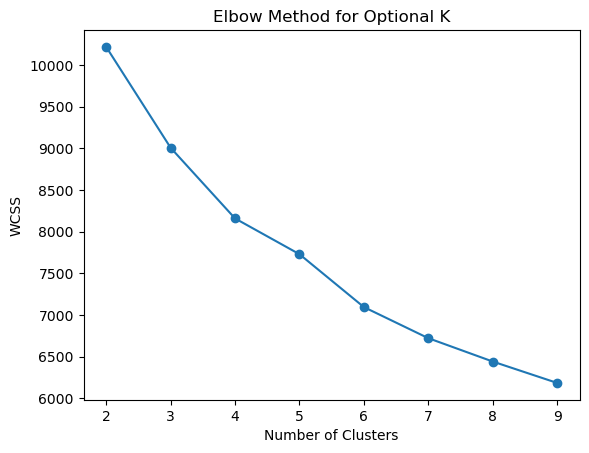

In [93]:
plt.plot(range(2,10),wcss,marker = "o")
plt.title("Elbow Method for Optional K")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [94]:
kmeans = KMeans(n_clusters = 6)
data["Cluster"] = kmeans.fit_predict(X_scaled)

In [96]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Z_CostContact,Z_Revenue,Response,Age,Total_Children,Total_Spending,Customer_Since,AcceptedAny,AgeGroup,Cluster
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,3,11,1,68,0,1617,4881,1,60-69,4
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,3,11,0,71,2,27,4331,0,70+,5
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,3,11,0,60,0,776,4530,0,50-59,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,3,11,0,41,1,53,4357,0,40-49,5
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,3,11,0,44,1,422,4379,0,40-49,1


In [100]:
cluster_summary = data.groupby("Cluster")[Features].mean()

In [101]:
cluster_summary

,Age,Income,Total_Spending,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth,Recency
Cluster,,,,,,,
0,60.964029,55479.517986,620.064748,5.892086,6.705036,6.025180,20.276978
1,55.988395,37082.862669,135.058027,2.446809,3.491296,6.369439,75.835590
2,46.122257,79012.852665,1320.576803,4.564263,8.551724,2.598746,48.952978
3,69.945392,74080.593857,1182.880546,4.436860,8.337884,2.443686,54.180887
4,58.910653,61402.103093,1007.597938,8.333333,8.491409,6.292096,62.384880
5,50.675676,31671.886100,81.113900,1.870656,2.980695,6.646718,27.264479


In [102]:
data["Cluster"].value_counts()

Cluster
5    518
1    517
2    319
3    293
4    291
0    278
Name: count, dtype: int64

In [103]:
from sklearn.decomposition import PCA

pca = PCA(n_components= 2)
pca_data = pca.fit_transform(X_scaled)
data["PCA1"],data["PCA2"] = pca_data[:,0], pca_data[:,1]

In [104]:
pca_data

array([[ 1.1075188 , -0.21175951],
       [-1.33673385,  0.269839  ],
       [ 1.88227676, -1.01416098],
       ...,
       [ 1.1535966 ,  1.15056999],
       [ 1.88768024, -1.16073698],
       [-0.84182091, -0.15963623]], shape=(2216, 2))

In [105]:
data["PCA2"]

0      -0.211760
1       0.269839
2      -1.014161
3      -0.704928
4       1.235265
          ...   
2235   -0.535766
2236   -0.141328
2237    1.150570
2238   -1.160737
2239   -0.159636
Name: PCA2, Length: 2216, dtype: float64

In [106]:
data["PCA1"]

0       1.107519
1      -1.336734
2       1.882277
3      -1.784359
4       0.020363
          ...   
2235    1.248177
2236    0.508708
2237    1.153597
2238    1.887680
2239   -0.841821
Name: PCA1, Length: 2216, dtype: float64

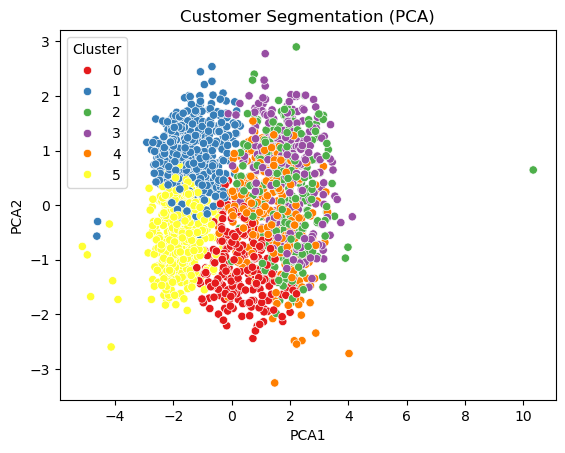

In [108]:
sns.scatterplot(x="PCA1", y="PCA2", hue = "Cluster", data = data,palette = "Set1")
plt.title("Customer Segmentation (PCA)")
plt.show()

In [109]:
cluster_summary

,Age,Income,Total_Spending,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth,Recency
Cluster,,,,,,,
0,60.964029,55479.517986,620.064748,5.892086,6.705036,6.025180,20.276978
1,55.988395,37082.862669,135.058027,2.446809,3.491296,6.369439,75.835590
2,46.122257,79012.852665,1320.576803,4.564263,8.551724,2.598746,48.952978
3,69.945392,74080.593857,1182.880546,4.436860,8.337884,2.443686,54.180887
4,58.910653,61402.103093,1007.597938,8.333333,8.491409,6.292096,62.384880
5,50.675676,31671.886100,81.113900,1.870656,2.980695,6.646718,27.264479


In [110]:
import joblib
joblib.dump(kmeans,"kmeans_model.pkl")
joblib.dump(scaler,"scaler.pkl")

['scaler.pkl']